In [1]:
import os
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
# path
images_dir = "dataset/images"
xml_dir = "dataset/annotations"

current_dir = Path.cwd()

parent_dir = os.path.dirname(current_dir)

IMAGES_FOLDER = os.path.join(parent_dir, images_dir)
XML_FOLDER = os.path.join(parent_dir, xml_dir)

print("current_dir:", current_dir)
print("parent_dir:", parent_dir)
print("IMAGES_FOLDER:", IMAGES_FOLDER)
print("XML_FOLDER:", XML_FOLDER)

current_dir: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP263-DeepLearning/assignment/project/W25_COMP263_002_Group1/results
parent_dir: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP263-DeepLearning/assignment/project/W25_COMP263_002_Group1
IMAGES_FOLDER: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP263-DeepLearning/assignment/project/W25_COMP263_002_Group1/dataset/images
XML_FOLDER: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP263-DeepLearning/assignment/project/W25_COMP263_002_Group1/dataset/annotations


In [3]:
# read XML files
xml_files = [f for f in os.listdir(XML_FOLDER) if f.endswith(".xml")]

# read image files
image_files = [f for f in os.listdir(IMAGES_FOLDER) if f.endswith(".png")]

In [4]:
print(len(xml_files))
print(len(image_files))

853
853


In [5]:
# keep xml and image file have same order
xml_files.sort()
image_files.sort()

In [6]:
def show_image(xml_path, image_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Count the number of each class
    class_counts = {"with_mask": 0, "without_mask": 0, "mask_weared_incorrect": 0}
    bounding_boxes = []
    
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Parse XML to get all bounding boxes
    for obj in root.findall("object"):
        class_name = obj.find("name").text
        class_counts[class_name] += 1
    
        bndbox = obj.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
    
        bounding_boxes.append((class_name, xmin, ymin, xmax, ymax))
    
        # Draw bounding boxes
        color = (0, 255, 0) if class_name == "with_mask" else (255, 0, 0) if class_name == "without_mask" else (255, 165, 0)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)
        cv2.putText(image, class_name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Count the total number of bounding boxes
    total_boxes = sum(class_counts.values())
    
    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Total Boxes: {total_boxes}\nWith Mask: {class_counts['with_mask']} | "
              f"Without Mask: {class_counts['without_mask']} | "
              f"Mask Weared Incorrect: {class_counts['mask_weared_incorrect']}")
    plt.show()
    
    # Print statistics
    print(total_boxes, class_counts)

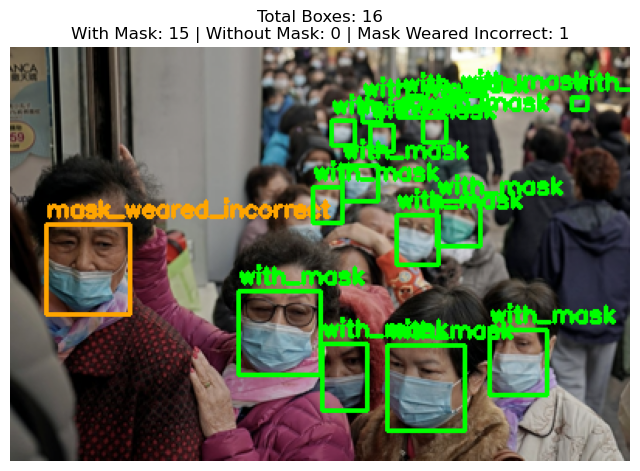

16 {'with_mask': 15, 'without_mask': 0, 'mask_weared_incorrect': 1}


In [7]:
xml_path = os.path.join(XML_FOLDER, xml_files[13])
image_path = os.path.join(IMAGES_FOLDER, image_files[13])

show_image(xml_path, image_path)

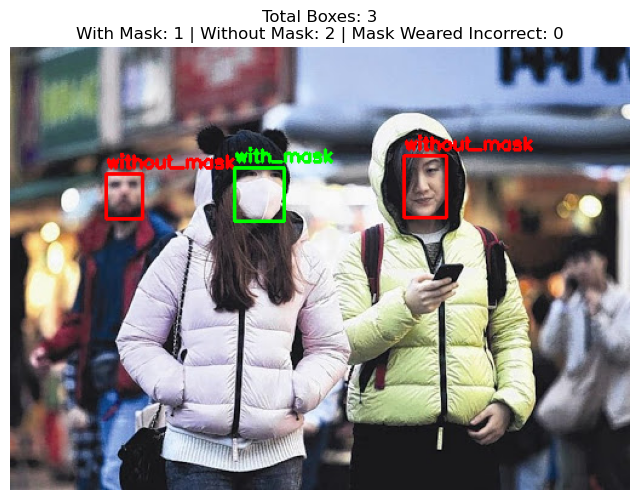

3 {'with_mask': 1, 'without_mask': 2, 'mask_weared_incorrect': 0}


In [8]:
xml_path = os.path.join(XML_FOLDER, xml_files[0])
image_path = os.path.join(IMAGES_FOLDER, image_files[0])

show_image(xml_path, image_path)

In [14]:
# calculate number of each class and total number of boxes
class_counts = {"with_mask": 0, "without_mask": 0, "mask_weared_incorrect": 0}
total_boxes = 0

In [15]:
for f in xml_files:
    xml_path = os.path.join(XML_FOLDER, f)

    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # all xml files
    for obj in root.findall("object"):
        class_name = obj.find("name").text
        class_counts[class_name] += 1

In [16]:
print(class_counts)

{'with_mask': 3232, 'without_mask': 717, 'mask_weared_incorrect': 123}


In [17]:
total_boxes = sum(class_counts.values())

In [18]:
print(total_boxes)

4072


In [19]:
"""
There are 853 images in our dataset, totally 4072 objects/faces.
"""

'\nThere are 853 images in our dataset, totally 4072 objects/faces.\n'